In [34]:
import sqlite3
def list_tables(database_file):
    connection = sqlite3.connect('data.db')
    cursor = connection.cursor()
    cursor.execute("""select name from sqlite_master where type = 'table';
                    """)
                    
    tables = cursor.fetchall()
    cursor.close()
    connection.close()
    table_names = [table[0] for table in tables]
    return table_names




In [35]:
import pandas as pd
connection = sqlite3.connect('data.db')
query = """select *
        from client as cl;
        """
client = pd.read_sql_query(query, connection)
connection.close

<function Connection.close()>

In [36]:
import pandas as pd
connection = sqlite3.connect('data.db')
query = """select *
        from client_products as cl;
        """
client_products = pd.read_sql_query(query, connection)
connection.close

<function Connection.close()>

In [37]:
import pandas as pd
connection = sqlite3.connect('data.db')
query = """select *
        from balances as cl;
        """
balances = pd.read_sql_query(query, connection)
connection.close

<function Connection.close()>

In [38]:
import pandas as pd
connection = sqlite3.connect('data.db')
query = """select *
        from inv_campaign_eval as cl;
        """
inv_campaign_eval = pd.read_sql_query(query, connection)
connection.close

<function Connection.close()>

In [39]:
connection = sqlite3.connect('data.db')
query = """
        select *
        from client as cl
        left join client_products as cp on cl.client_id = cp.client_id
        --left join balances as ba on cl.client_id = ba.client_id
        left join inv_campaign_eval as camp on cl.client_id = camp.client_id;
        """
clients_merged = pd.read_sql_query(query, connection)
connection.close

<function Connection.close()>

In [40]:
my_database_file_path = "/content/data.db"

In [41]:

print(client.head(10))
print(client_products.head(10))
print(balances.head(10))
print(inv_campaign_eval.head(10))
print(clients_merged.head(10))

    client_id   age            job   marital  education gender
0   249789938  38.0       services   married  secondary      M
1  1222646323  46.0       services  divorced    unknown      M
2   451375919  33.0         admin.    single  secondary      F
3   338972671  44.0  self-employed   married  secondary      F
4  1472834688  36.0    blue-collar   married    primary      M
5  1068680340  63.0         admin.   married  secondary      F
6   711558356  38.0  self-employed    single   tertiary      F
7   422084751  30.0     technician    single  secondary      M
8   123316323  36.0    blue-collar  divorced  secondary      F
9  1504633819  38.0     management   married   tertiary      M
    client_id has_deposits loan has_insurance has_mortgage
0   249789938          yes   no             n           no
1  1222646323           no   no             n           no
2   451375919           no   no             n          yes
3   338972671           no   no             y          yes
4  147283468

In [42]:
# Corrected filter
filter_condition = (clients_merged["poutcome"] == 'failure')

# Add a new column "has_family" and initialize it to 0
clients_merged["success"] = 1

# Set "has_family" to 1 where the filter condition is met
clients_merged.loc[filter_condition, "success"] = 0

# Display the DataFrame
print(clients_merged)

        client_id   age            job   marital  education gender  \
0       249789938  38.0       services   married  secondary      M   
1      1222646323  46.0       services  divorced    unknown      M   
2       451375919  33.0         admin.    single  secondary      F   
3       338972671  44.0  self-employed   married  secondary      F   
4      1472834688  36.0    blue-collar   married    primary      M   
...           ...   ...            ...       ...        ...    ...   
11157   543198889  40.0    blue-collar    single    unknown      M   
11158   458558558  41.0      housemaid  divorced    primary      F   
11159  1426334329  59.0     technician   married    primary      F   
11160   831035343  42.0     management   married   tertiary      M   
11161   705801685  36.0    blue-collar    single  secondary      F   

        client_id has_deposits loan has_insurance has_mortgage    client_id  \
0       249789938          yes   no             n           no  249789938.0   
1

Text(0.5, 1.0, 'Survival Rate by Sex')

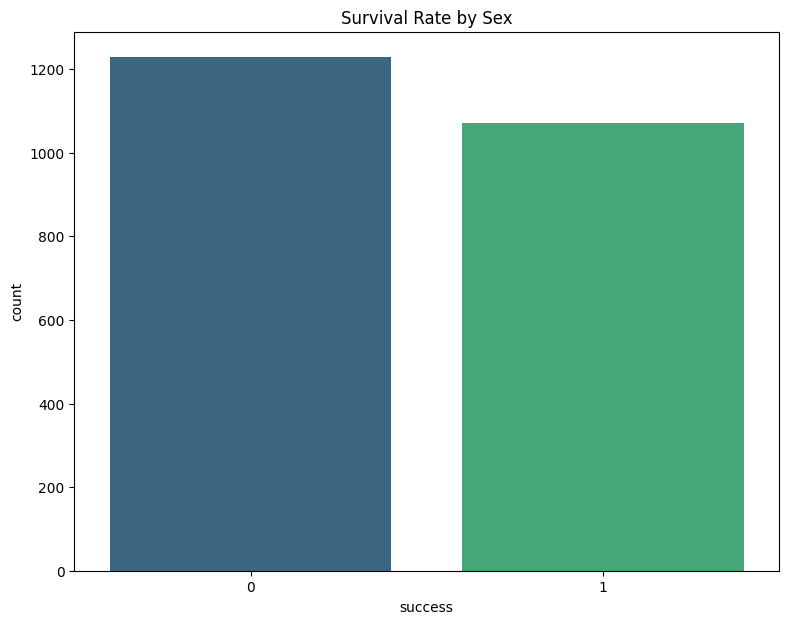

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 7))

# Survival rate by Sex
plt.subplot(1, 2, 1)
sns.countplot(data=inv_campaign_eval, x='success', palette='viridis')
plt.title('Survival Rate by Sex')

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# List of columns for univariate analysis
columns_to_analyze = ['Survived', 'Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare']
